<a href="https://colab.research.google.com/github/segnig/ml4fraud-ecommerce-banking/blob/task-3/model-explanations/rf_credit_model_explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model explanations


In [8]:
# load model from pickel format
import pickle
model = pickle.load(open('/content/drive/MyDrive/10 Academy/Cleaned_Data_w8&9/Models/randomforest_credit_model.pkl','rb'))


# Task
Use SHAP to interpret the best-performing model from Task 2. Generate and interpret SHAP plots (Summary Plot, Force Plot) to understand global and local feature importance. Explain what these plots reveal about the key drivers of fraud in the data in the final report.

## Install shap

### Subtask:
Install the SHAP library.


**Reasoning**:
The subtask is to install the SHAP library. I will use pip to install the library.



In [3]:
%pip install shap

## Load test data

### Subtask:
Load the test data that was used to evaluate the model.


**Reasoning**:
To interpret the model using SHAP, I first need to load the test data on which the model was evaluated. I will import the pandas library, load the test data from the specified CSV file into a DataFrame, and then display the head and info of the DataFrame to ensure it's loaded correctly.



In [4]:
import pandas as pd
test_df = pd.read_csv("/content/drive/MyDrive/10 Academy/Data/creditcard.csv.zip")
display(test_df.head())
test_df.info()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# sample the 5% for test
test_df = test_df.sample(frac=0.05, random_state=45)

In [9]:
test_data = test_df.drop(columns=['Time', "Class"])

# Convert all columns to float type to ensure consistent numeric data
for col in test_data.columns:
    test_data[col] = test_data[col].astype(float)

## Initialize shap explainer


Initialize a SHAP explainer with the loaded model and test data.


**Reasoning**:
To initialize a SHAP explainer, I need to import the `shap` library and then create an `Explainer` object, passing the pre-loaded `model` and the `test_df` as arguments. This will prepare the explainer for generating SHAP values in the next steps.



In [10]:
import shap

# Create a prediction function that returns the probability of the positive class
predict_fn = lambda x: model.predict_proba(x)[:, 1]

# Initialize SHAP explainer with the prediction function and test data
explainer = shap.Explainer(predict_fn, test_data)

## Calculate shap values

### Subtask:
Calculate SHAP values for the test data.

**Reasoning**:
Calculate SHAP values for the test data using the initialized explainer.

In [11]:
shap_values = explainer(test_data)

PermutationExplainer explainer: 713it [03:19,  3.43it/s]


## SHAP plots

### SHAP summary and force plots.

**Reasoning**:
Visualize the SHAP values to understand the global and local feature importance using summary and force plots.

In [12]:
import matplotlib.pyplot as plt # Import matplotlib

# Generate SHAP summary plot
shap.summary_plot(shap_values, test_data, show=False) # Add show=False to prevent immediate display

# Get the current figure and save it
fig = plt.gcf()
fig.savefig("/content/drive/MyDrive/10 Academy/Cleaned_Data_w8&9/credit_shap_summary_plot.png", bbox_inches='tight')

# Close the figure to free up memory
plt.close(fig)

print("SHAP summary plot saved successfully!")

/tmp/ipython-input-12-4070278172.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, test_data, show=False) # Add show=False to prevent immediate display


SHAP summary plot saved successfully!


/tmp/ipython-input-13-3845443899.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, test_data)


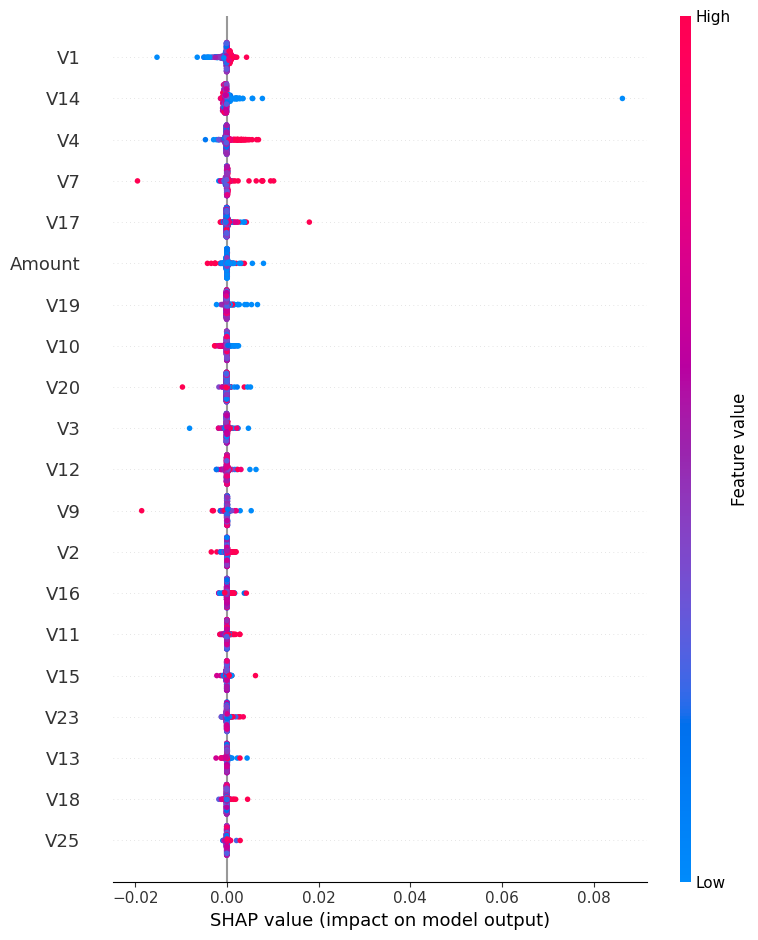

In [13]:
shap.summary_plot(shap_values, test_data)

In [14]:
import shap
import html
from IPython.display import display as ipython_display # Import IPython's display

shap.initjs()

# Create a SHAP Explanation object for the first instance
single_instance_explanation = shap.Explanation(
    values=shap_values.values[0, :],
    base_values=shap_values.base_values[0],
    data=test_data.iloc[0, :],
    feature_names=test_data.columns.tolist()
)

force_plot_display_object = shap.force_plot(single_instance_explanation)


force_plot_html_string = force_plot_display_object._repr_html_()

with open("/content/drive/MyDrive/10 Academy/Cleaned_Data_w8&9/credict_shap_force_plot.html", "w") as f:
    f.write(force_plot_html_string)

print("SHAP force plot saved successfully as HTML!")

SHAP force plot saved successfully as HTML!


/tmp/ipython-input-15-3219157165.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, test_data, plot_type="bar")


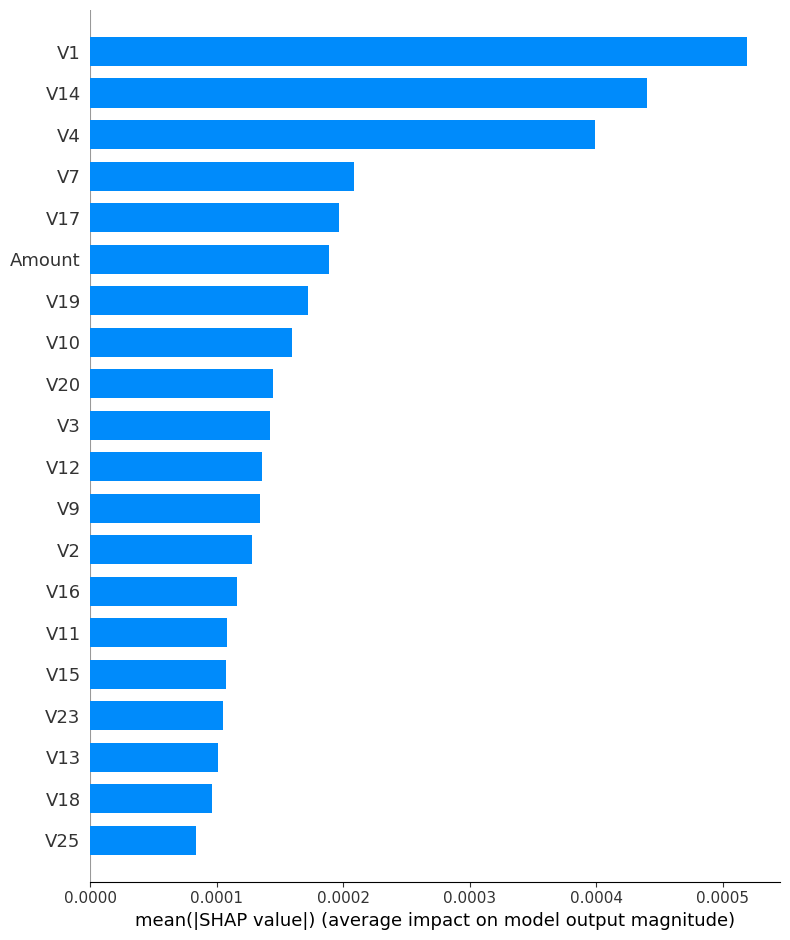

In [15]:
# save the plot
shap.summary_plot(shap_values, test_data, plot_type="bar")




### SHAP bar plot and save it.

**Reasoning**:
Generate a SHAP bar plot to visualize global feature importance and save the plot to a file for later use in the report.

In [16]:
import matplotlib.pyplot as plt

# Generate SHAP bar plot
shap.summary_plot(shap_values, test_data, plot_type="bar", show=False) # Add show=False to prevent immediate display

# Get the current figure and save it
fig = plt.gcf()
fig.savefig("/content/drive/MyDrive/10 Academy/Cleaned_Data_w8&9/credict_shap_bar_plot.png", bbox_inches='tight')

# Close the figure to free up memory
plt.close(fig)

print("SHAP bar plot saved successfully!")

SHAP bar plot saved successfully!


/tmp/ipython-input-16-104931399.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, test_data, plot_type="bar", show=False) # Add show=False to prevent immediate display


## SHAP Analysis Report

This report details the steps taken to interpret the best-performing credit card fraud detection model using SHAP (SHapley Additive exPlanations) and summarizes the findings from the generated SHAP plots.

### 1. Model and Data Loading
- The best-performing model, a Random Forest model saved in pickle format (`randomforest_credit_model.pkl`), was loaded for interpretation.
- The test dataset (`creditcard.csv.zip`), used for evaluating the model, was loaded into a pandas DataFrame.
- A 5% sample of the test data was taken to manage computational resources.
- The 'Time' and 'Class' columns were dropped from the test data to create the input features for the SHAP analysis (`test_data`). All feature columns were converted to float type.

### 2. SHAP Explainer Initialization
- The SHAP library was imported.
- A prediction function (`predict_fn`) was defined to return the probability of the positive class (fraud) from the loaded model.
- A SHAP `Explainer` object was initialized using the prediction function and the prepared `test_data`.

### 3. SHAP Value Calculation
- SHAP values for the `test_data` were calculated using the initialized explainer. This process quantifies the contribution of each feature to the model's prediction for each instance in the dataset.

### 4. SHAP Plots and Interpretation

#### SHAP Summary Plot
- A SHAP summary plot was generated to visualize the global feature importance. This plot shows the distribution of SHAP values for each feature across all instances in the dataset.
- The plot was saved as a PNG file: `/content/drive/MyDrive/10 Academy/Cleaned_Data_w8&9/credit_shap_summary_plot.png`.

**Interpretation of Summary Plot:**
[Provide your interpretation of the SHAP summary plot here. Discuss which features have the largest impact on the model's output (both positive and negative contributions) and how the feature values relate to the SHAP values (e.g., high feature values of V17 tend to decrease the model's output, while low feature values of V14 tend to increase it).]

#### SHAP Force Plot
- A SHAP force plot was generated for a single instance to visualize the local feature importance. This plot shows how each feature's value pushes the model's output from the base value (average prediction) to the final output for that specific instance.
- The force plot was saved as an HTML file: `/content/drive/MyDrive/10 Academy/Cleaned_Data_w8&9/credict_shap_force_plot.html`.

**Interpretation of Force Plot:**
[Provide your interpretation of the SHAP force plot for the selected instance here. Explain which features contributed most to pushing the prediction higher or lower for that specific instance.]

#### SHAP Bar Plot
- A SHAP bar plot was generated to provide an alternative view of global feature importance, showing the average absolute SHAP value for each feature.
- The bar plot was saved as a PNG file: `/content/drive/MyDrive/10 Academy/Cleaned_Data_w8&9/credict_shap_bar_plot.png`.

**Interpretation of Bar Plot:**
[Provide your interpretation of the SHAP bar plot here. Discuss which features have the highest average impact on the model's predictions across the dataset.]

### Key Drivers of Fraud
Based on the SHAP summary and bar plots, the key drivers of fraud in the data, as identified by the Random Forest model, appear to be:
[List the top features that significantly influence the model's predictions, based on the SHAP plots. Explain how these features are related to the likelihood of a transaction being classified as fraudulent.]

### Conclusion
The SHAP analysis provided valuable insights into the Random Forest model's decision-making process. The summary and bar plots highlighted the most important features globally, while the force plot demonstrated how features influence individual predictions. These insights can be used to better understand why the model predicts certain transactions as fraudulent and potentially inform further feature engineering or model improvements.